# <font color=darkslateblue>Census Income Project</font>

Practice problems or data science projects are one of the best ways to learn data science. <br>**"You don’t learn data science until you start working on problems yourself."**

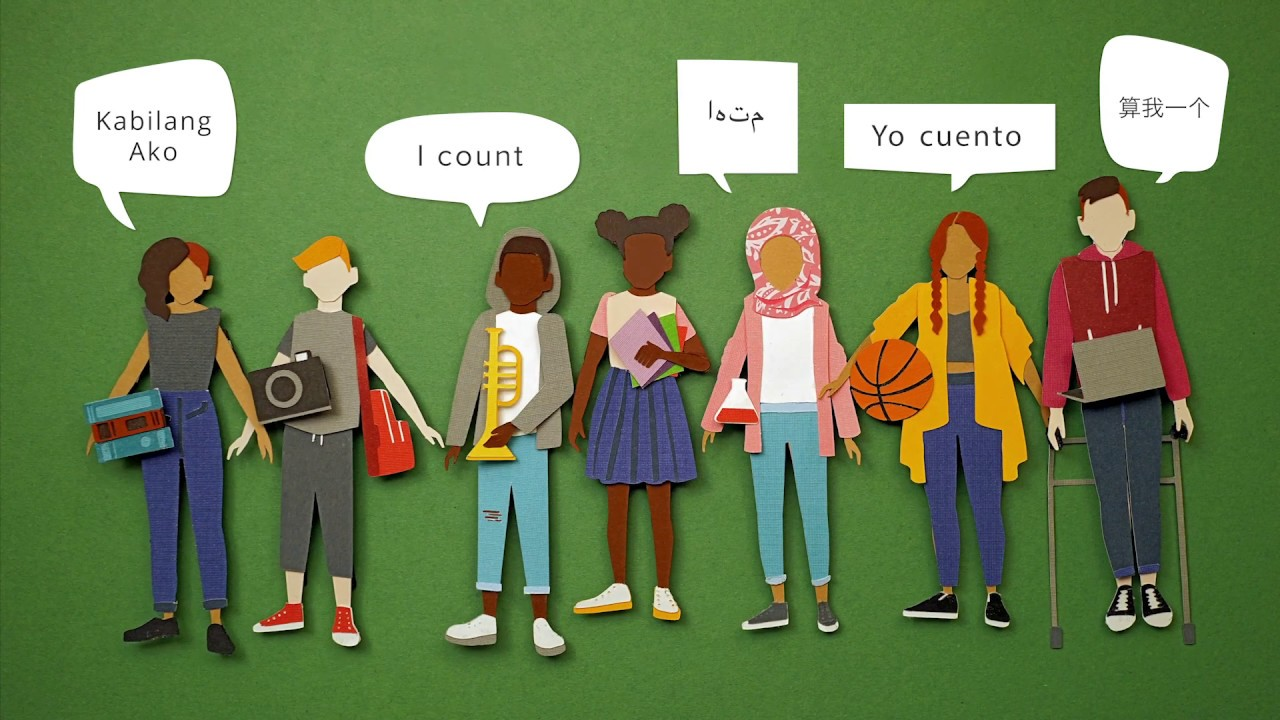

<font color=darkslateblue>**Problem Statement:**</font>


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The data can be downloaded [here](https://github.com/SheikhSAli/Machine-Learning-Blogs/blob/main/Census_raw_data.txt)

<font color=darkslateblue>**Hypothesis**</font>

<font color=darkslategray>A set of reasonably clean records was extracted using the following conditions:<br>
(**AGE > 16**) :- Age of the observed individual should be greater than 16 yrs.<br>
(**AFNLWGT > 1**) :- Final Weight should br greater than 1.<br>
(**HRSWK > 0**):- Hours per week should be greater than 0. The prediction task is to determine whether a person makes over $50K a year.</font>

#### <font color=darkslateblue>Data Eploration</font>

We’ll be performing some basic data exploration here and come up with some inferences about the data. We’ll try to figure out some irregularities and address them in the next section. If you are new to this domain, please refer our [Data Exploration Guide.](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

**Age** :- Age of the observed individual.<br>

**Work_Class** :-This feature has values associated with the working class of an individual , It has 8 categories with following value counts.<br>

**Final_Weight** :- Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:<br>
A single cell estimate of the population 16+ for each state.<br>
Controls for Hispanic Origin by age and sex.<br>
Controls by Race, age and sex.<br>
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.<br>

**Education** :- This feature has the level of education of an individual. This feature has 9 different value counts .<br>

**Education Number** :- This feature is almost similar to Education , difference is this feature has numbers given for any specified education.<br>

**Occupation** :- This feature has the details of the occupation of an individual.<br>

**Relationship** :- This feature describes the relationship of an individual with the household . This feature has 6 different criterian.<br>

**Race** :- This feature has the race of an individual.<br>

**Sex** :- This feature has the corresponding gender of an individual.<br>

**Capital Gain** :- Capital gain is the profit one earns on the sale of an asset like stocks, bonds or real estate. It results in capital gain when the selling price of an asset exceeds its purchase price. It is the difference between the selling price (higher) and cost price (lower) of the asset.<br>

**Capital Loss**  :- Capital loss arises when the cost price is higher than the selling price.<br>

**Hours per Week** :- The time in hour an individual spend a week in working.<br>

**Country** :- Individuals belonging to a countriey.<br>

**Target Variable**<br>
**Income** - By considering all the above factors we need to predict the Income of an individual whether its <=50k or >50k.
So this is a classification problem .

To read more about the data , value counts and explore more visit this [Census_Data_Description](https://github.com/SheikhSAli/Machine-Learning-Blogs/blob/main/Census_Data_Description.xlsx).

#### The prediction task is to determine whether a person makes over $50K a year.

### <font color=darkslateblue>Importing Libraries</font>

Here we are importing some necessary libraries needed for our classification problem.

To learn about the libraries kindly follow the link.<br>
[Numpy](https://numpy.org/) , [Pandas](https://pandas.pydata.org/) , [Matplotlib](https://matplotlib.org/stable/index.html) , [Seaborn](https://seaborn.pydata.org/)

In [177]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from matplotlib.cm import rainbow
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from matplotlib import rcParams
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import warnings 
warnings.filterwarnings('ignore')

Here we are importing our dataset which is in txt format with a ',' as a separator.

In [178]:
cdf = pd.read_csv('Census1.txt' , sep = ',' )

In [179]:
cdf.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


From above dataframe we can observe that the features names are abit more short and complex to read so we'll rename the features as per our convenience.

In [180]:
cdf.columns = columns = ['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education_Number', 'Marital_Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Country', 'Income']

In [181]:
cdf.head()

,Age,Work_Class,Final_Weight,Education,Education_Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Now let's extract some informations of the dataframe by using [DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). 

In [182]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32560 non-null  int64 
 1   Work_Class        32560 non-null  object
 2   Final_Weight      32560 non-null  int64 
 3   Education         32560 non-null  object
 4   Education_Number  32560 non-null  int64 
 5   Marital_Status    32560 non-null  object
 6   Occupation        32560 non-null  object
 7   Relationship      32560 non-null  object
 8   Race              32560 non-null  object
 9   Sex               32560 non-null  object
 10  Capital_Gain      32560 non-null  int64 
 11  Capital_Loss      32560 non-null  int64 
 12  Hours_per_Week    32560 non-null  int64 
 13  Country           32560 non-null  object
 14  Income            32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From above description we can observe that there is<br>
-A total of 15 columns are there.<br>
-A total of 32560 entries are there.<br>
-There is no Null entry present.<br>
-A total of 6 integer type and 9 object type feature is there.<br>
-The total memory taken by this DataFrame is more than 3.7 MB.<br>

### <font color=darkslateblue>Exploratory Data Analysis (EDA)</font>

In [183]:
cdf.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education_Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_Week      0
Country             0
Income              0
dtype: int64

In [184]:
cdf.describe()

,Age,Final_Weight,Education_Number,Capital_Gain,Capital_Loss,Hours_per_Week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**<font color=darkslateblue>Observations</font>**<br>
**1.** The average Age is 38.58 Yrs and the maximum Age of an individual is 90 Yrs .<BR>
**2.** The average Education number is 10.08, So we can conclude that the average number of individuals has some college degrees.<BR>
**3.** Things to consider here in Capital_Gain and Capital_Loss is there's a lot difference between mean of Capital_Gain and Capital_Loss.<BR>
**4.** The average Hours a Week an individual works is 40:43 hrs.

Let's try to find the features with integer datatype , and with object datatype .

In [185]:
int_type = [feature for feature in cdf.columns if cdf[feature].dtypes !='O']

print("Below are the features with Integer datatype and the total count is  :" , len(int_type))
print(int_type)

Below are the features with Integer datatype and the total count is  : 6
['Age', 'Final_Weight', 'Education_Number', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week']


In [186]:
object_type = [feature for feature in cdf.columns if cdf[feature].dtypes =='O']

print("Below are the features with Object datatype and the total count is  :" , len(object_type))
print(object_type)

Below are the features with Object datatype and the total count is  : 9
['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Income']


Above is the list of all features with their respective datatypes.

#### **Age**

In [187]:
cdf.Age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

From above we can observe that there are a lot of values of Age feature . So Here, we'll group the ages into separate bins as mentioned below.

0-25: Young<br>
25-50: Adult<br>
50-100: Old<br>

In [188]:
cdf['Age'] = pd.cut(cdf['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='Age', ylabel='count'>

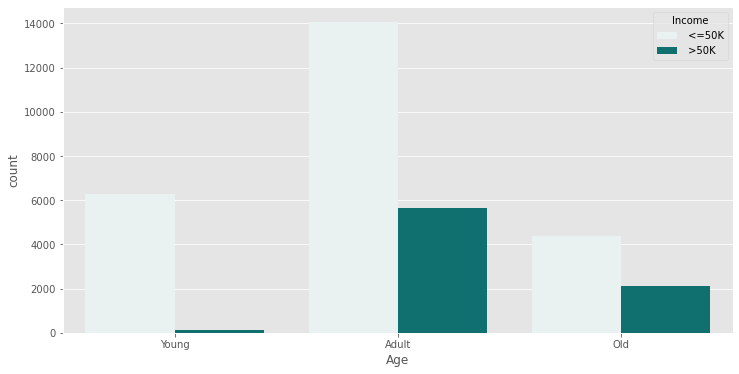

In [189]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Age', hue = 'Income', data = cdf , color = 'teal' )

<font color=darkslateblue>**Observations:**</font><br>
- Majority of the Young people (ages between 0-25)  has income less than or equal to 50K.<br>
- Adults has higher percentages of getting an income less than or equal to 50K as compared to Young people and the ratio of Adult people getting an income <=50k and >50k is almonst 1:3 .<br>
- The Old people section has almost (50 - 50)% of people gettting an income less than or equal to 50k and getting an income greater than $50k.

Now lets move on to our next feature i.e Work_Class . We'll try to visualise how the work_class is relative to income of an individual.

**Work Class**

In [190]:
cdf['Work_Class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work_Class, dtype: int64

<font color=darkslateblue>Observations</font><br>
- There are 22696 individuals who work in Private sector and this is the max of work class in which an individual works.<br>
- A total of (2093+1297+960) = 4350 individuals work under Government , whether Local , State or Federal.<br>
- There is a very less number of people who never worked.<br>
- There are 1836 individuals whose work class is not known.

In [191]:
cdf['Work_Class'] = cdf['Work_Class'].astype(object)

We will replace the ('?' Not Known) with Private.

In [192]:
cdf['Work_Class'].replace(' ?' , ' Private' , inplace = True)

In [193]:
cdf['Work_Class'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work_Class, dtype: int64

We'll drop two work classes i.e Without-pay and Never-Worked as their value count is very very less as compared to whole data.

In [194]:
cdf = cdf.drop(cdf[cdf['Work_Class'] == ' Without-pay'].index)
cdf = cdf.drop(cdf[cdf['Work_Class'] == ' Never-worked'].index)

<AxesSubplot:xlabel='Work_Class', ylabel='count'>

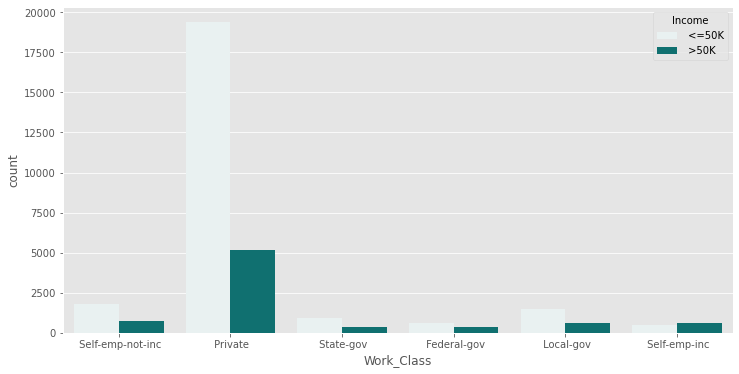

In [195]:
plt.figure(figsize= (12,6))
sns.countplot(x = 'Work_Class', hue = 'Income', data = cdf , color = 'teal')

<font color=darkslateblue>Observations</font><br>
- The private work_class has the highest sector in which the individuals are having income more than 50k.<br>
- Self-emp-inc is the work_class in which the individuals having income more than 50k is greater than individuals having income less than 50k.

**Final Weight**<br>

This is the most important feature according to our importance bar . The description of final weight can be found above .

In [196]:
cdf['Final_Weight'].value_counts()

123011    13
164190    13
203488    13
121124    12
148995    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: Final_Weight, Length: 21634, dtype: int64

In [197]:
cdf['Final_Weight'].nunique()

21634

There are 21647 unique values in this feature.

<AxesSubplot:xlabel='Income', ylabel='Final_Weight'>

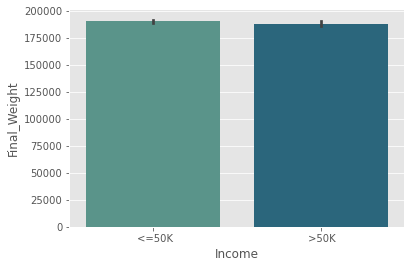

In [198]:
sns.barplot(x = 'Income', y = 'Final_Weight', data = cdf , palette = 'crest')

Final Weight of individuals having income <=50k is a bit high as compared to individuals having income >50k.

**Education and Education Number**<br>

It's a good time to check if there is any relation between Education and Education Number.

In [199]:
education_classes = cdf['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, cdf[cdf['Education'] == edu_class]['Education_Number'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  1st-4th, the Education Number is [2]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]


From above, We have found that Education Number and Education are just the same. So, we can drop any one column.<br> Also, we'll combine all informations from Preschool to 12th as they can be considered of one class who have no college/university level education.

In [200]:
cdf.drop(['Education_Number'], axis = 1, inplace = True)
cdf['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
cdf['Education'].value_counts()

 HS-grad         10491
 Some-college     7286
 Bachelors        5354
 School           4248
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1066
 Prof-school       576
 Doctorate         413
Name: Education, dtype: int64

<font color=darkslateblue>observations</font><br>
- The most number of individuals 10491 are having Hs-grad as their education.<br>
- The lowest number of individuals are having Doctorate as their education level.<br>

<AxesSubplot:xlabel='Education', ylabel='count'>

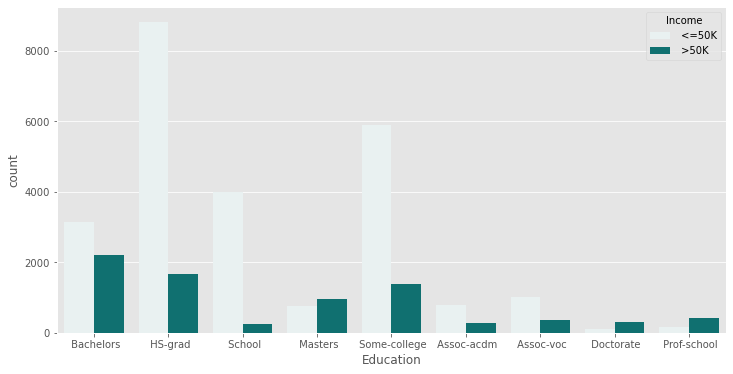

In [201]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Education', hue = 'Income', data = cdf , color = 'teal')

<font color=darkslateblue>**Observations**</font>
- Bachelors are having the most number of individuals with the highest number of individuals having income greater than 50 k.<br>
- Hs grad is the education level in which there is highest number of individuals having income less than or equal to 50k.<br>
- Masters , Doctorate and Prof-School are the education level in which the number of individuals getting an income of more than 50k is more as compared to individuals having income less than 50k.

**Marital Status**

In [202]:
cdf['Marital_Status'].value_counts()

 Married-civ-spouse       14967
 Never-married            10673
 Divorced                  4442
 Separated                 1025
 Widowed                    992
 Married-spouse-absent      417
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

- Married-civ-spouse :- Married-civ-spouse corresponds to a civilian spouse while *Married-AF-spouse* is a spouse in the Armed Forces.<br>
- Married-spouse-absent :- Married-spouse-absent applies to husbands and wives who answered that they were Now married on the census form but no spouse could be found who could be linked to them in the editing stages.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

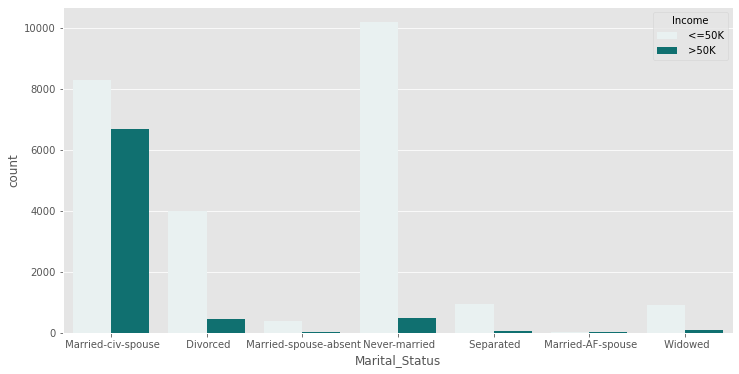

In [203]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Marital_Status', hue = 'Income', data = cdf , color = 'teal')

<font color=darkslateblue>Observations</font>
- Married with civilian has the highest number of individuals having an income of greater than 50k.<br>
- Never-married are the individuals having income maximum numbers in having an income less than 50k.

**Relationship**

In [204]:
cdf['Relationship'].value_counts()

 Husband           13189
 Not-in-family      8303
 Own-child          5058
 Unmarried          3444
 Wife               1564
 Other-relative      981
Name: Relationship, dtype: int64

<font color=darkslateblue>Observations</font><br>
- Individuals living in with husband are the hihest in numbers.<br>
- Then comes to individuals not living with the family.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

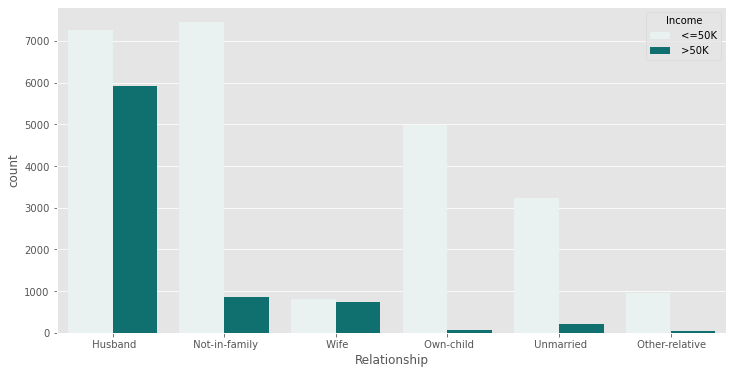

In [205]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Relationship', hue = 'Income', data = cdf , color = 'teal')

<font color=darkslateblue>Observations</font><br>
- Individuals living with husband are in the highest in numbers on having an income for both less than or equal to 50k and income of greater than 50k.

**Occupation**

In [206]:
cdf['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4098
 Exec-managerial      4066
 Adm-clerical         3766
 Sales                3650
 Other-service        3294
 Machine-op-inspct    2001
 ?                    1836
 Transport-moving     1596
 Handlers-cleaners    1369
 Farming-fishing       988
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In here we can observe that there are values with '?' and values of Priv-house-serv are very less so we'll conclude all of them to Other-service.

In [207]:
cdf['Occupation'].replace([' Other-service',' ?',' Armed-Forces',' Priv-house-serv'] , ' Other-service'  , inplace = True)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

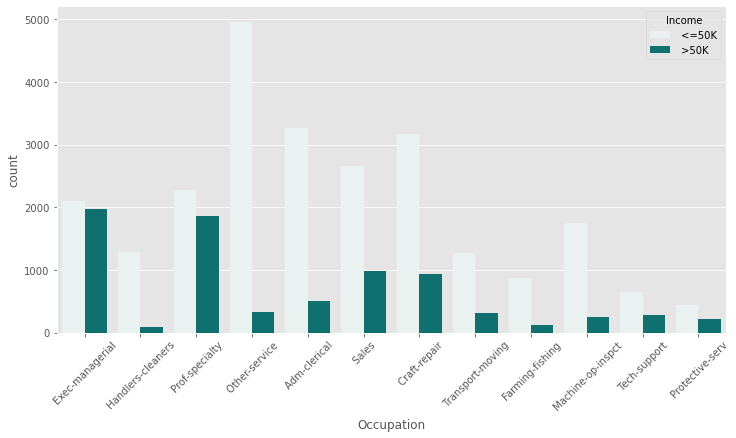

In [208]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = cdf , color = 'teal')

In [209]:
cdf.Occupation.value_counts()

 Other-service        5288
 Prof-specialty       4140
 Craft-repair         4098
 Exec-managerial      4066
 Adm-clerical         3766
 Sales                3650
 Machine-op-inspct    2001
 Transport-moving     1596
 Handlers-cleaners    1369
 Farming-fishing       988
 Tech-support          928
 Protective-serv       649
Name: Occupation, dtype: int64

<font color=darkslateblue>Observations</font><br>
- Exec-mangerial and Prof-speciality are the occupation fields where the incomes greater than 50k are the highest.
- Other-service are the occupation fields where the incomes less than or equal to 50k is maximum. 

**Race**

In [210]:
cdf['Race'].value_counts()

 White                 27798
 Black                  3121
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Here the majority of the individuals are White , so we'll group this feature as White and others as Black .

In [211]:
cdf['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Black', inplace = True)

<AxesSubplot:xlabel='Race', ylabel='count'>

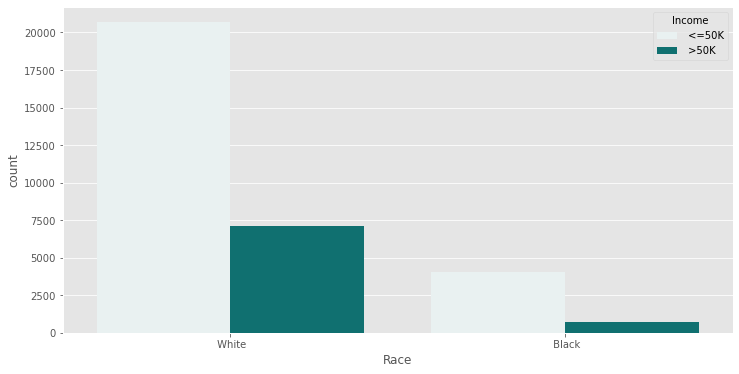

In [212]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Race', hue = 'Income', data = cdf , color = 'teal')

<font color=darkslateblue>Observation</font><br>
- From above we can observe that from both the datas of White and Black individuals , Whites has more individuals having an income of less than or equal to 50K and greater than 50k.

**Sex**

In [213]:
cdf['Sex'].value_counts()

 Male      21775
 Female    10764
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

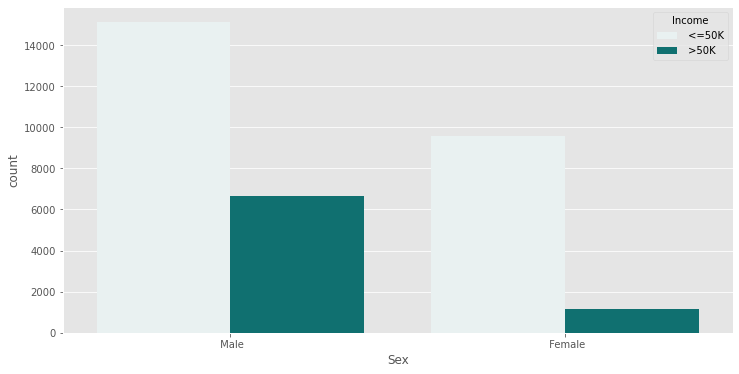

In [214]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Sex', hue = 'Income', data = cdf , color = 'teal')

<font color=darkslateblue>Observations</font><br>
- There are almost twice Male participants as compared to Female participants
-  When we compare the two genders and the corresponding income distribution, more percentage of Males individuals have an income of less than or equal to 50k or greater than 50K than Females.

**Capital Gain and Capital Loss**<br>

Rather than having both Capital Gain and Capital Loss feature , we will use their difference as that is more relevant and will be more helpful in our future predictions.

In [215]:
cdf['Capital_Diff'] = cdf['Capital_Gain'] - cdf['Capital_Loss']
cdf.drop(['Capital_Gain'], axis = 1, inplace = True)
cdf.drop(['Capital_Loss'], axis = 1, inplace = True)

In [216]:
print(cdf['Capital_Diff'].min())
print(cdf['Capital_Diff'].max())

-4356
99999


The lowest value is -4356 , so we'll take the lowest bin as -5000 and the highest value is 99999 so our highest bin will bw 100000 . Below we are creating two ranges -5000 to 5000 as Minor and 5000 to 10000 as Major.

<AxesSubplot:xlabel='Capital_Diff', ylabel='count'>

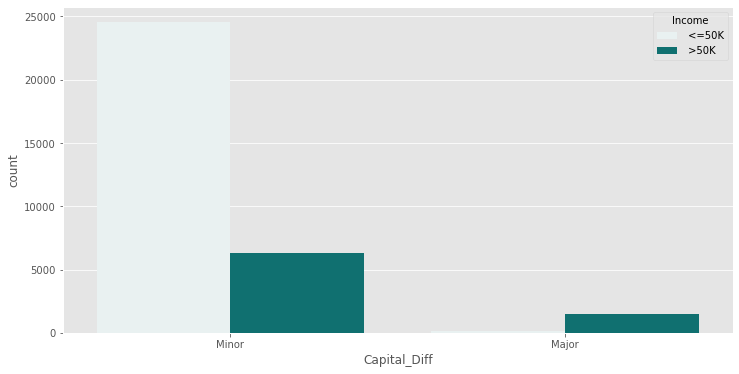

In [217]:
plt.figure(figsize = (12,6))
cdf['Capital_Diff'] = pd.cut(cdf['Capital_Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x ='Capital_Diff' , hue = 'Income', data = cdf , color = 'teal' )

<font color = darkslateblue>Observations</font><br>
- Individuals having minor capital diff are more in numbers on having an income less than or equal to 50k and greater than or equal to 50k.
- Individuals having Major capital diff are more on having an income greater than 50k as compared to individials having an income less than or equal to 50k.

**Hours per Week**<br>

 As usually, the working hours are close to 30-40 hours, so we'll create bins of 0-30, 30-40, and 40-100 hrs .

In [218]:
cdf['Hours_per_Week'] = pd.cut(cdf['Hours_per_Week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser_Hours', 'Normal_Hours', 'Extra_Hours'])

<AxesSubplot:xlabel='Hours_per_Week', ylabel='count'>

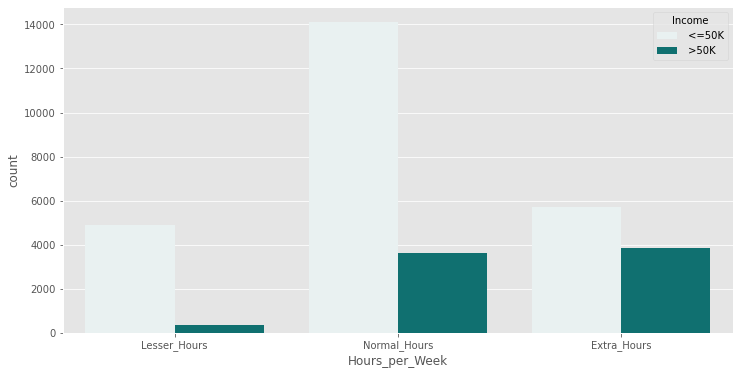

In [219]:
plt.figure(figsize= (12,6))
sns.countplot(x = 'Hours_per_Week', hue = 'Income', data = cdf , color = 'teal')

<font color=darkslateblue>Observations</font>
- Individuals working normal hours i.e in between 30-40 hrs a week are the most in having an income less than or equal to 50k.
- Individuals working extra hours i.e more than 40 hrs a week more in numbers on having an income greater than 50k as compared to individuals working 30-40 hrs.

**Country**

Countries from which servey's are carried out .

In [220]:
cdf['Country'].value_counts()

 United-States                 29149
 Mexico                          643
 ?                               583
 Philippines                     197
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [221]:
countries = np.array(cdf['Country'].unique())
countries

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

We can observe that out of 32560 , 29149 observations are from United states , so here we'll group all the other countries as other . So basically we will have teo categories United States and Other.

In [222]:
cdf['Country'].replace([' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], 'Other'  , inplace = True)

<AxesSubplot:xlabel='count', ylabel='Country'>

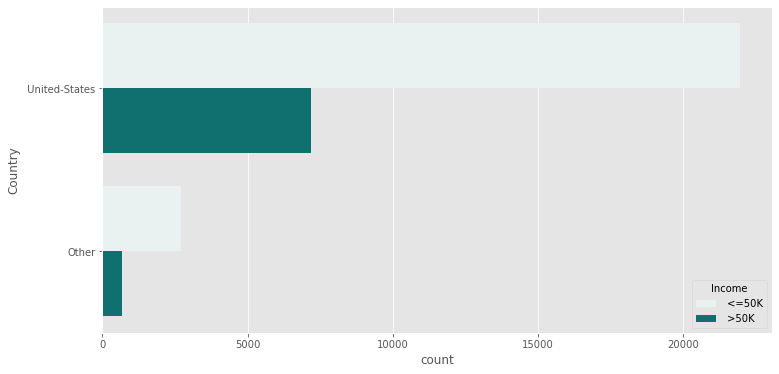

In [223]:
plt.figure(figsize = (12,6))
sns.countplot(y = 'Country', hue = 'Income', data = cdf , color = 'teal')

<font color = darkslateblue>Observations</font><br>
- In united states and in other both section has greater number of individuals having an income less than or equal to 50k as compared to individuals having an income greater than 50k.

In [224]:
cdf.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Income,Capital_Diff
0,Adult,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Lesser_Hours,United-States,<=50K,Minor
1,Adult,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal_Hours,United-States,<=50K,Minor
2,Old,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Normal_Hours,United-States,<=50K,Minor
3,Adult,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Normal_Hours,Other,<=50K,Minor
4,Adult,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,Normal_Hours,United-States,<=50K,Minor


Till here we have successfully completed our Data Exploration and Data Analysis part . We had gone through each feature , explored a bit more about that feature. Now lets move towards [Data Preprocessing](https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/) process.

## <font color=darkslateblue>Data Preprocessing</font>

#### **[Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)**

Here we'll Label Encode all our categorical features , so it can be converted to numbers and would be easier for us to work it with algorithms.

In [225]:
from sklearn.preprocessing import LabelEncoder
def encoder(feature):
    le = LabelEncoder()
    cdf[feature] = le.fit_transform(cdf[feature])
    return cdf[feature].value_counts()

**Age**

In [226]:
encoder('Age')

0    19686
1     6452
2     6401
Name: Age, dtype: int64

**Work_Class**

In [227]:
encoder('Work_Class')

2    24532
4     2541
1     2093
5     1297
3     1116
0      960
Name: Work_Class, dtype: int64

**Education**

In [228]:
encoder('Education')

4    10491
8     7286
2     5354
7     4248
5     1723
1     1382
0     1066
6      576
3      413
Name: Education, dtype: int64

**Marital_Status**

In [229]:
encoder('Marital_Status')

2    14967
4    10673
0     4442
5     1025
6      992
3      417
1       23
Name: Marital_Status, dtype: int64

**Occupation**

In [230]:
encoder('Occupation')

6     5288
7     4140
1     4098
2     4066
0     3766
9     3650
5     2001
11    1596
4     1369
3      988
10     928
8      649
Name: Occupation, dtype: int64

**Relationship**

In [231]:
encoder('Relationship')

0    13189
1     8303
3     5058
4     3444
5     1564
2      981
Name: Relationship, dtype: int64

**Relationship**

In [232]:
encoder('Relationship')

0    13189
1     8303
3     5058
4     3444
5     1564
2      981
Name: Relationship, dtype: int64

**Race**

In [233]:
encoder('Race')

1    27798
0     4741
Name: Race, dtype: int64

**Sex**

In [234]:
encoder('Sex')

1    21775
0    10764
Name: Sex, dtype: int64

**Capital_Difference**

In [235]:
encoder('Capital_Diff')

1    30891
0     1648
Name: Capital_Diff, dtype: int64

**Hours per Week**

In [236]:
encoder('Hours_per_Week')

2    17728
0     9577
1     5234
Name: Hours_per_Week, dtype: int64

**Country**

In [237]:
encoder('Country')

0    29149
1     3390
Name: Country, dtype: int64

**Income**

In [238]:
encoder('Income')

0    24698
1     7841
Name: Income, dtype: int64

In [239]:
cdf.head()

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Income,Capital_Diff
0,0,4,83311,2,2,2,0,1,1,1,0,0,1
1,0,2,215646,4,0,4,1,1,1,2,0,0,1
2,1,2,234721,7,2,4,0,0,1,2,0,0,1
3,0,2,338409,2,2,7,5,0,0,2,1,0,1
4,0,2,284582,5,2,2,5,1,0,2,0,0,1


Above we can observe that we have successfully encoded all our feature datas. Now lets move on to check for Outliers .
Kindly visit this [To_learn_about_Outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) to have a broader understanding about outliers.

#### <font color = darkslateblue>Visualising & Removing Outliers</font>

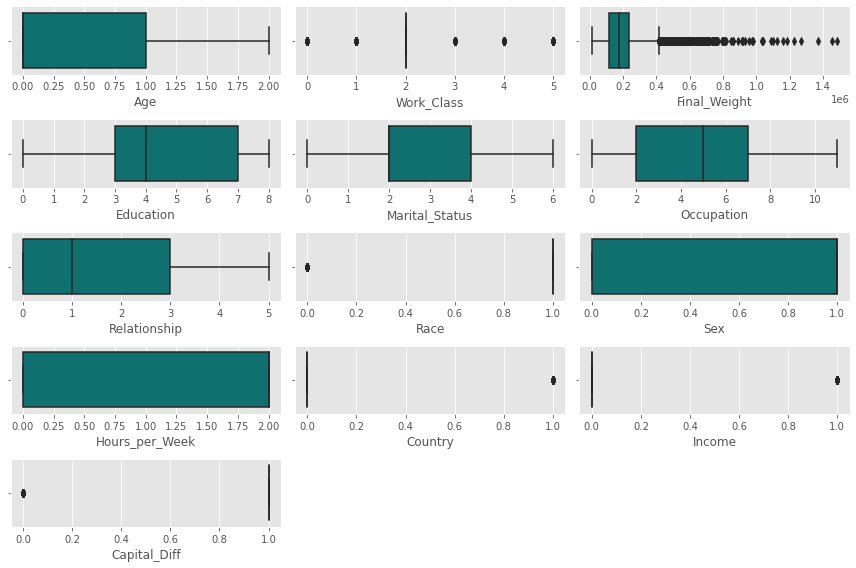

In [240]:
collist=cdf.columns.values
ncol=3
nrows=5
plt.figure(figsize=(12,8) ,tight_layout = True)
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(cdf[collist[i]], orient = 'v' , color = 'teal')
    plt.tight_layout()

By observing the boxplot above we can conclude that there are Outliers present in our data , So we will use [Zscore](https://www.statisticshowto.com/probability-and-statistics/z-score/#:~:text=Technically%2C%20a%20z%2Dscore%20is,standard%20deviation%20above%20the%20mean.) to deal with it.

In [241]:
from scipy.stats import zscore
Z_score  = np.abs(zscore(cdf))

Above we have applied zscore on our dataframe , now we'll create a new dataframe with removed outliers i.e (cdf_wo).

In [242]:
cdf_wo = cdf[(Z_score<3).all(axis = 1)]

In [243]:
print(cdf.shape)
print(cdf_wo.shape)

(32539, 13)
(29347, 13)


As we processed our dataframe and removed outliers from our dataset now lets move on to splitting our values to **Predictor and Target Variable**.

##### **Predictor Variables**

In [244]:
x = cdf_wo.drop('Income' , axis = 1)
x

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Capital_Diff
0,0,4,83311,2,2,2,0,1,1,1,0,1
1,0,2,215646,4,0,4,1,1,1,2,0,1
2,1,2,234721,7,2,4,0,0,1,2,0,1
3,0,2,338409,2,2,7,5,0,0,2,1,1
4,0,2,284582,5,2,2,5,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,2,2,310152,8,4,8,1,1,1,2,0,1
32555,0,2,257302,0,2,10,5,1,0,2,0,1
32556,0,2,154374,4,2,5,0,1,1,2,0,1
32557,1,2,151910,4,6,0,4,1,0,2,0,1


##### **Target Variable**

In [245]:
y = cdf_wo['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32554    0
32555    0
32556    1
32557    0
32558    0
Name: Income, Length: 29347, dtype: int32

### <font color = darkslateblue>Skewness</font>

Skewness is the measure of the asymmetry of an ideally symmetric probability distribution and is given by the third standardized moment. If that sounds way too complex, don’t worry! Let me break it down for you.

In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. Click to explore more and learn about [Skewness](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/)

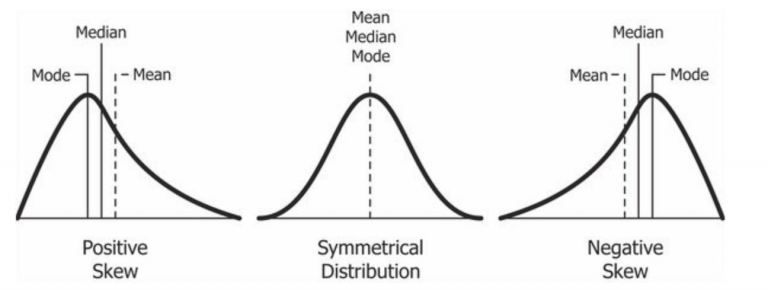

**DataFrame.skew()** - Return unbiased skew over requested axis. [DataFrame.skew()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html)

In [246]:
x.skew()

Age               0.827782
Work_Class        0.665786
Final_Weight      0.628465
Education        -0.069226
Marital_Status   -0.050466
Occupation        0.104167
Relationship      0.743121
Race             -2.015913
Sex              -0.688574
Hours_per_Week   -0.528888
Country           2.555130
Capital_Diff      0.000000
dtype: float64

**Distplot** - A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions. Seaborn distplot lets you show a histogram with a line on it. To explore a more about distplot [Distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html).

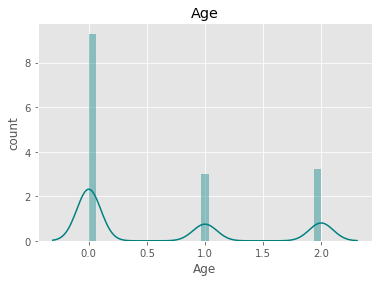

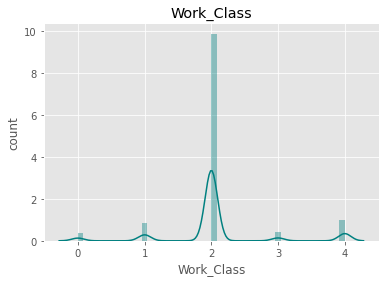

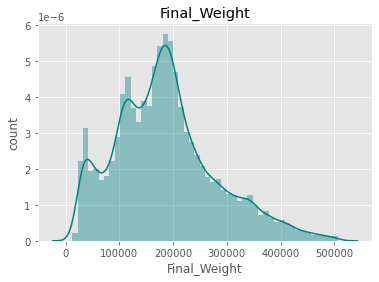

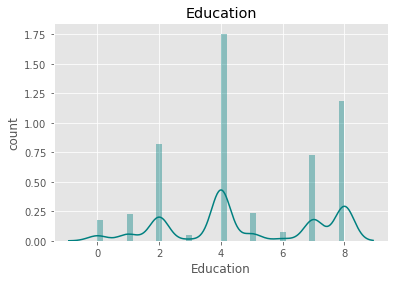

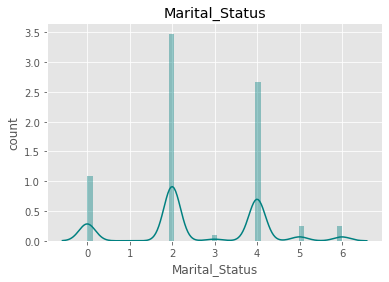

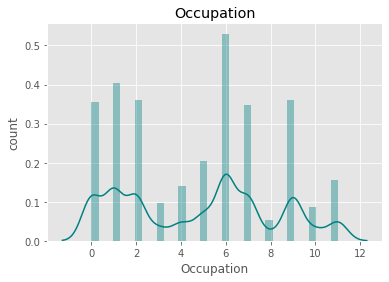

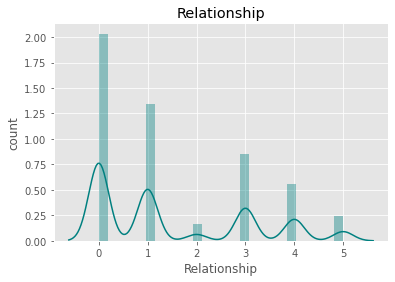

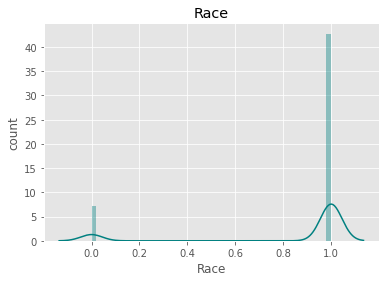

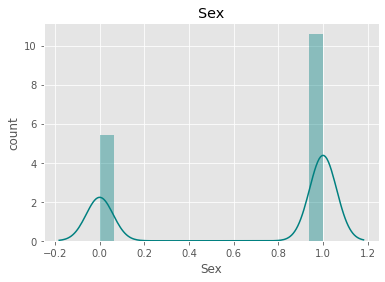

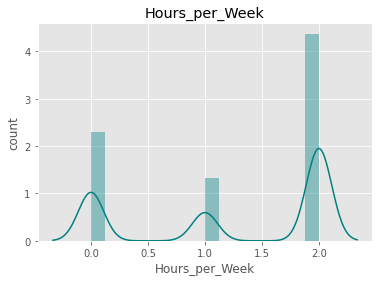

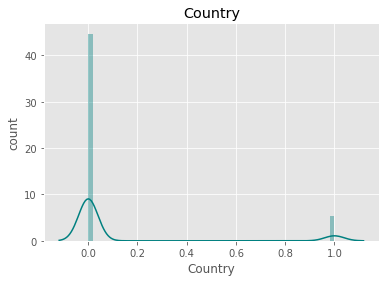

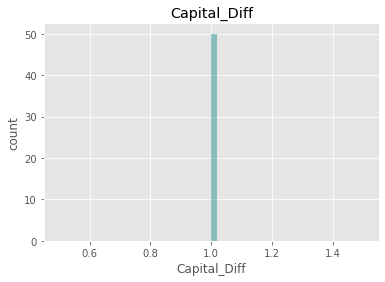

In [247]:
for feature in x :
    sns.distplot(x[feature] , kde = True , color = 'teal' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

The rule of thumb is: If the skewness is between -0.5 and 0.5, the datas are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

From above distplot we can conclude that there is skewness in our dataframe features so we need to perform some [Skewness_removal](https://opendatascience.com/transforming-skewed-data-for-machine-learning/) techniques.

Here we will use **[Power Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)** for transforming/removing skewness from our dataset .

In [248]:
from sklearn.preprocessing import PowerTransformer
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x)

The output of power transformer is an array as we can see below , so we'll create a dataframe of this array .

In [249]:
x_t

array([[-0.00000000e+00,  3.22329537e+00,  8.97919173e+02, ...,
         1.23171606e+00, -0.00000000e+00,  1.81053137e+01],
       [-0.00000000e+00,  1.74058620e+00,  1.51207890e+03, ...,
         2.84775244e+00, -0.00000000e+00,  1.81053137e+01],
       [ 4.25477738e-01,  1.74058620e+00,  1.58393664e+03, ...,
         2.84775244e+00, -0.00000000e+00,  1.81053137e+01],
       ...,
       [-0.00000000e+00,  1.74058620e+00,  1.25905917e+03, ...,
         2.84775244e+00, -0.00000000e+00,  1.81053137e+01],
       [ 4.25477738e-01,  1.74058620e+00,  1.24800824e+03, ...,
         2.84775244e+00, -0.00000000e+00,  1.81053137e+01],
       [ 5.28760717e-01,  1.74058620e+00,  1.45687181e+03, ...,
         1.23171606e+00, -0.00000000e+00,  1.81053137e+01]])

In [250]:
x_trans = pd.DataFrame(x_t , columns = x.columns)
x_trans

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Capital_Diff
0,-0.000000,3.223295,897.919173,1.844670,1.904911,1.550234,-0.000000,94.877303,2.351621,1.231716,-0.000000,18.105314
1,-0.000000,1.740586,1512.078900,3.526794,0.000000,2.697373,0.625897,94.877303,2.351621,2.847752,-0.000000,18.105314
2,0.425478,1.740586,1583.936636,5.899778,1.904911,2.697373,-0.000000,0.000000,2.351621,2.847752,-0.000000,18.105314
3,-0.000000,1.740586,1935.350855,1.844670,1.904911,4.109382,1.386416,0.000000,0.000000,2.847752,0.073719,18.105314
4,-0.000000,1.740586,1760.179839,4.333731,1.904911,1.550234,1.386416,94.877303,0.000000,2.847752,-0.000000,18.105314
...,...,...,...,...,...,...,...,...,...,...,...,...
29342,0.528761,1.740586,1845.108452,6.663578,3.707467,4.529521,0.625897,94.877303,2.351621,2.847752,-0.000000,18.105314
29343,-0.000000,1.740586,1665.664071,0.000000,1.904911,5.316717,1.386416,94.877303,0.000000,2.847752,-0.000000,18.105314
29344,-0.000000,1.740586,1259.059170,3.526794,1.904911,3.198823,-0.000000,94.877303,2.351621,2.847752,-0.000000,18.105314
29345,0.425478,1.740586,1248.008243,3.526794,5.454761,0.000000,1.276876,94.877303,0.000000,2.847752,-0.000000,18.105314


In [251]:
x_trans.skew()

Age               0.463781
Work_Class        0.235653
Final_Weight     -0.035435
Education        -0.156926
Marital_Status   -0.126979
Occupation       -0.205755
Relationship      0.100192
Race             -2.015913
Sex              -0.688574
Hours_per_Week   -0.448593
Country           2.555130
Capital_Diff      0.000000
dtype: float64

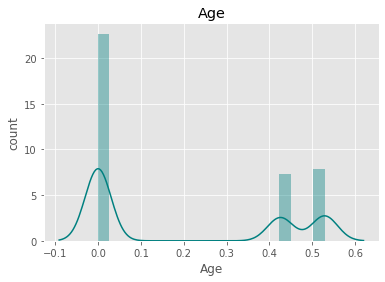

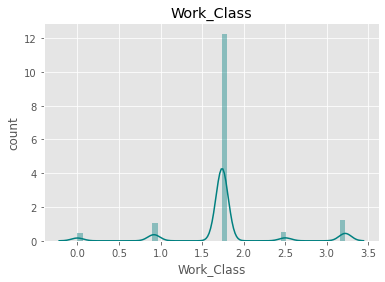

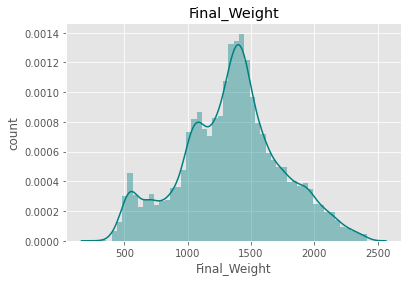

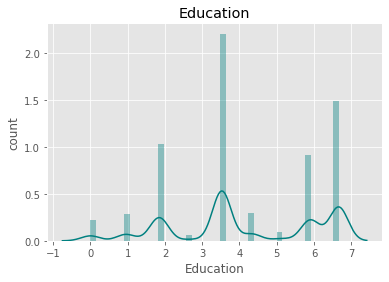

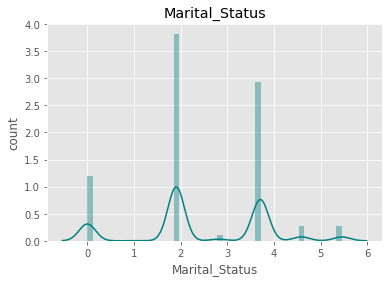

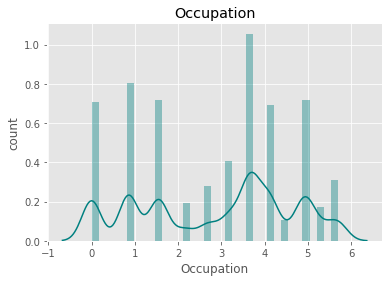

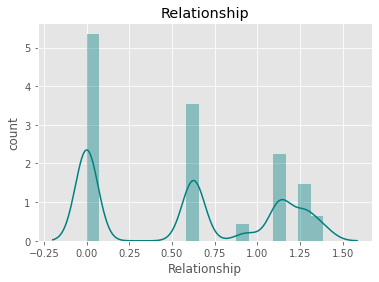

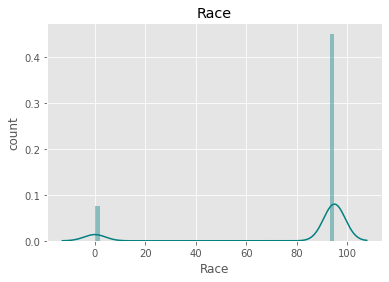

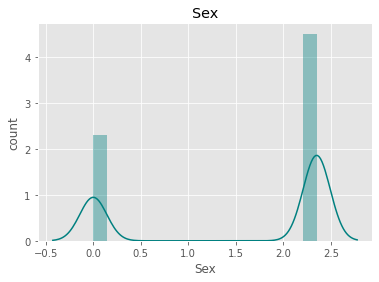

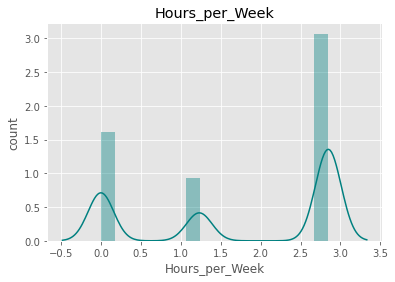

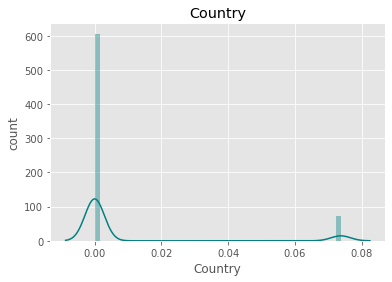

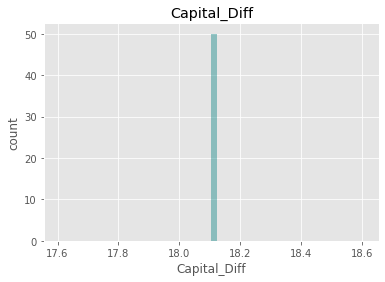

In [252]:
for feature in x_trans :
    sns.distplot(x_trans[feature] , kde = True , color = 'teal' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

From above we can observe that we have sucessfully removed skewness and outliers from our dataset. Skewness left is of categorical datas. Now lets move on to scale our datas as there are a lot of variation in our dataset . 

### <font color = darkslateblue>Feature Scaling</font>

Feature scaling can vary our results a lot while using certain algorithms and have a minimal or no effect in others. To understand this, let’s look why features need to be scaled, varieties of scaling methods and when we should scale our features.<br>

*What is Feature Scaling?*<br>
It refers to putting the values in the same range or same scale so that no variable is dominated by the other.<br>

*Why Scaling?*<br>
Most of the times, our dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

So here we'll use Standard scaling to scale our dataset.
kinldy go through this [standard scaling](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=Standardization%20is%20another%20scaling%20technique,has%20a%20unit%20standard%20deviation.) article to have a broader understanding of scaling and normalisation.


Gaussian's distribution with zero mean and unit variance is standard scaling.<br>
Statistical formula of standardisation is as follows:-

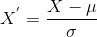

**[Standard scaling sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**

In [253]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[-0.80940221,  2.51339555, -1.11760963, ..., -0.42136855,
        -0.34484593,  0.        ],
       [-0.80940221, -0.06408003,  0.42226777, ...,  0.86380259,
        -0.34484593,  0.        ],
       [ 0.98651424, -0.06408003,  0.60243605, ...,  0.86380259,
        -0.34484593,  0.        ],
       ...,
       [-0.80940221, -0.06408003, -0.21212642, ...,  0.86380259,
        -0.34484593,  0.        ],
       [ 0.98651424, -0.06408003, -0.23983432, ...,  0.86380259,
        -0.34484593,  0.        ],
       [ 1.4224656 , -0.06408003,  0.28384751, ..., -0.42136855,
        -0.34484593,  0.        ]])

The output of standard scaling returns an array , so we'll convert them as dataframe .

In [254]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,Age,Work_Class,Final_Weight,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Capital_Diff
0,-0.809402,2.513396,-1.117610,-1.163230,-0.402818,-0.750279,-1.118193,0.411909,0.713332,-0.421369,-0.344846,0.0
1,-0.809402,-0.064080,0.422268,-0.306553,-1.771809,-0.097904,0.088732,0.411909,0.713332,0.863803,-0.344846,0.0
2,0.986514,-0.064080,0.602436,0.901965,-0.402818,-0.097904,-1.118193,-2.427719,0.713332,0.863803,-0.344846,0.0
3,-0.809402,-0.064080,1.483534,-1.163230,-0.402818,0.705103,1.555252,-2.427719,-1.401871,0.863803,2.899846,0.0
4,-0.809402,-0.064080,1.044329,0.104405,-0.402818,-0.750279,1.555252,0.411909,-1.401871,0.863803,-0.344846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29342,1.422466,-0.064080,1.257270,1.290955,0.892613,0.944035,0.088732,0.411909,0.713332,0.863803,-0.344846,0.0
29343,-0.809402,-0.064080,0.807351,-2.102687,-0.402818,1.391711,1.555252,0.411909,-1.401871,0.863803,-0.344846,0.0
29344,-0.809402,-0.064080,-0.212126,-0.306553,-0.402818,0.187270,-1.118193,0.411909,0.713332,0.863803,-0.344846,0.0
29345,0.986514,-0.064080,-0.239834,-0.306553,2.148329,-1.631893,1.344023,0.411909,-1.401871,0.863803,-0.344846,0.0


Above we have successfully scaled all our datas in a nominal range. Now let's move on to check for correlation in between the predictor variables .

### <font color = darkslateblue>Correlation Heatmap</font>

Correlation matrices are an essential tool of exploratory data analysis. **Correlation heatmaps** contain the same information in a visually appealing way. What more: they show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems. Have a look on this article on [heatmaps](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e#:~:text=From%20now%20on%2C%20we%20are,in%20a%20visually%20appealing%20way.) to have a broader understanding of heatmaps.

<AxesSubplot:>

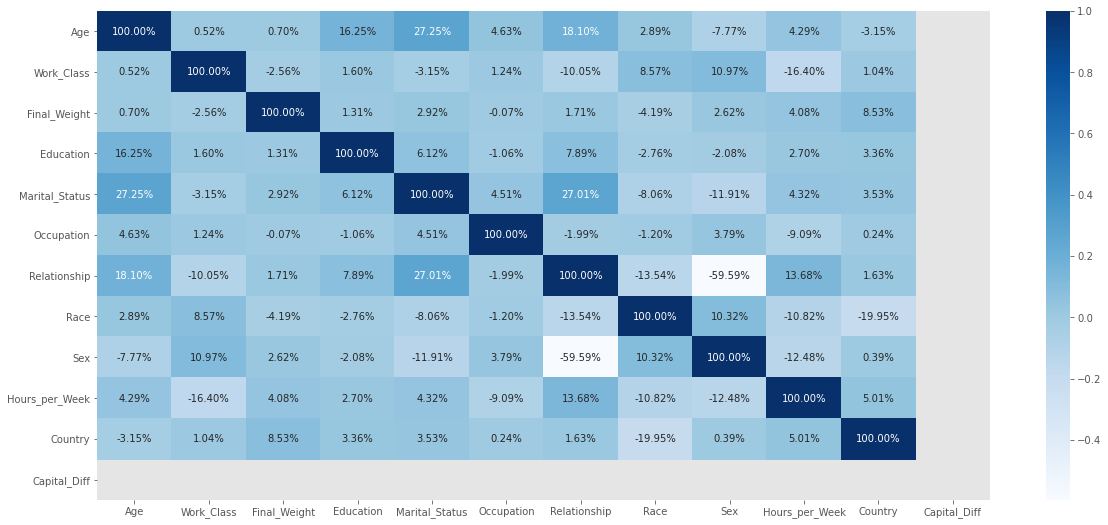

In [255]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = 'Blues' , annot = True , fmt = '.2%')

From above we can observe that our predictor variables are not very much correlated with each other , so we will not have a need of [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 

**Importance Bar Graph**<br>
Tree based machine learning algorithms such as Random Forest and XGBoost come with a feature importance attribute that outputs an array containing a value between 0 and 1 for each feature representing how useful the model found each feature in trying to predict the target.<br>
This graph shows the importance of each feature in predicting target variable .

In [256]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=42)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
importances = pd.DataFrame({'feature':x_sc.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Final_Weight,0.411
Occupation,0.112
Education,0.109
Relationship,0.105
Marital_Status,0.086
Work_Class,0.051
Age,0.046
Hours_per_Week,0.042
Race,0.013


<AxesSubplot:xlabel='feature'>

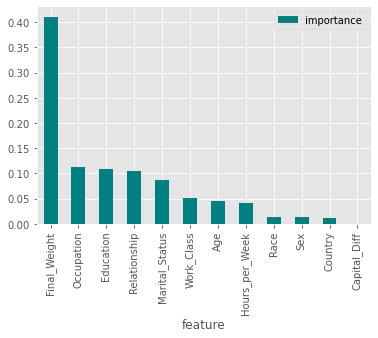

In [257]:
importances.plot.bar(color = 'teal')

<font color = darkslateblue>Observations</font><br>
- From above importance graph we can conclude that final weight is highly important in predicting our target.<br>
- Capital_diff is very very less important in predicting our target variable i.e income.

## <font color = darkslateblue>Machine Learning Models</font>

In here we will use various classification algorithm to predict our target. Let's have an overview of the algorithms we will use for our predictions. To read more about these algorithms , just click on the algorithms name. <br>
- [Logistic Regression](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)<br>
:- Logistic regression uses an equation as the representation, very much like linear regression.<br>
Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a *binary value* (0 or 1) rather than a numeric value.
Below is an example logistic regression equation:

*y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))*

Where y is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x).

- [K-Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)<br> :- 
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, knn find the one closest point to P1 and then the label of the nearest point assigned to P1.<br>
Suppose P1 is the point, for which label needs to predict. First, knn find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, knkn find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.


- [Support Vector Classifier (SVC)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)<br>
:- In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. Support Vectors are simply the co-ordinates of individual observation. The SVM classifier is a frontier which best segregates the two classes (hyper-plane/ line).


- [Random Forest Classifier](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)<br>
:- It technically is an ensemble method (based on the divide-and-conquer approach) of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute. Each tree depends on an independent random sample. In a classification problem, each tree votes and the most popular class is chosen as the final result.


- [AdaBoost Classifier](https://www.datacamp.com/community/tutorials/adaboost-classifier-python)<br>
:- Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and *Robert Schapire* in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.


- [Decision Tree Classifier](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)<br>
:- A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.


- [Gaussian](https://www.geeksforgeeks.org/naive-bayes-classifiers/)<br>
:- Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. 

### <font color= darkslateblue>Finding Best Random State</font>

An algorithm might have multiple points that introduce randomness to the process and thus introduce randomness to the result.
One method to make sure our results are constant is to set every possible *random_state* available in the functions that we use.

### <font color = darkslateblue>Train_Test_Split</font>


The [Train_Test_Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is a technique for evaluating the performance of a machine learning algorithm.<br>
It can be used for classification or regression problems and can be used for any supervised learning algorithm.<br>
The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

In finding best random state we are using random forest classifier as our classification algorithm.

In [258]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf=rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8291879613855764 on random state  75


Below we'll apply different classifier algorithms to find the best model for our further predictions.

In [259]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=13)

models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))

LogisticRegression  -  0.803086359653393
Accuracy: 0.8039750141964793
Confusion Matrix:
 [[6786 1497]
 [ 229  293]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8283
           1       0.16      0.56      0.25       522

    accuracy                           0.80      8805
   macro avg       0.57      0.69      0.57      8805
weighted avg       0.92      0.80      0.85      8805

K Nearest Neighbor  -  0.8679778015772563
Accuracy: 0.8201022146507666
Confusion Matrix:
 [[6377  946]
 [ 638  844]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7323
           1       0.47      0.57      0.52      1482

    accuracy                           0.82      8805
   macro avg       0.69      0.72      0.70      8805
weighted avg  

**Accuracy Plot**

Plotting Accuracies of different Algorithms to find the perfect one for our model.

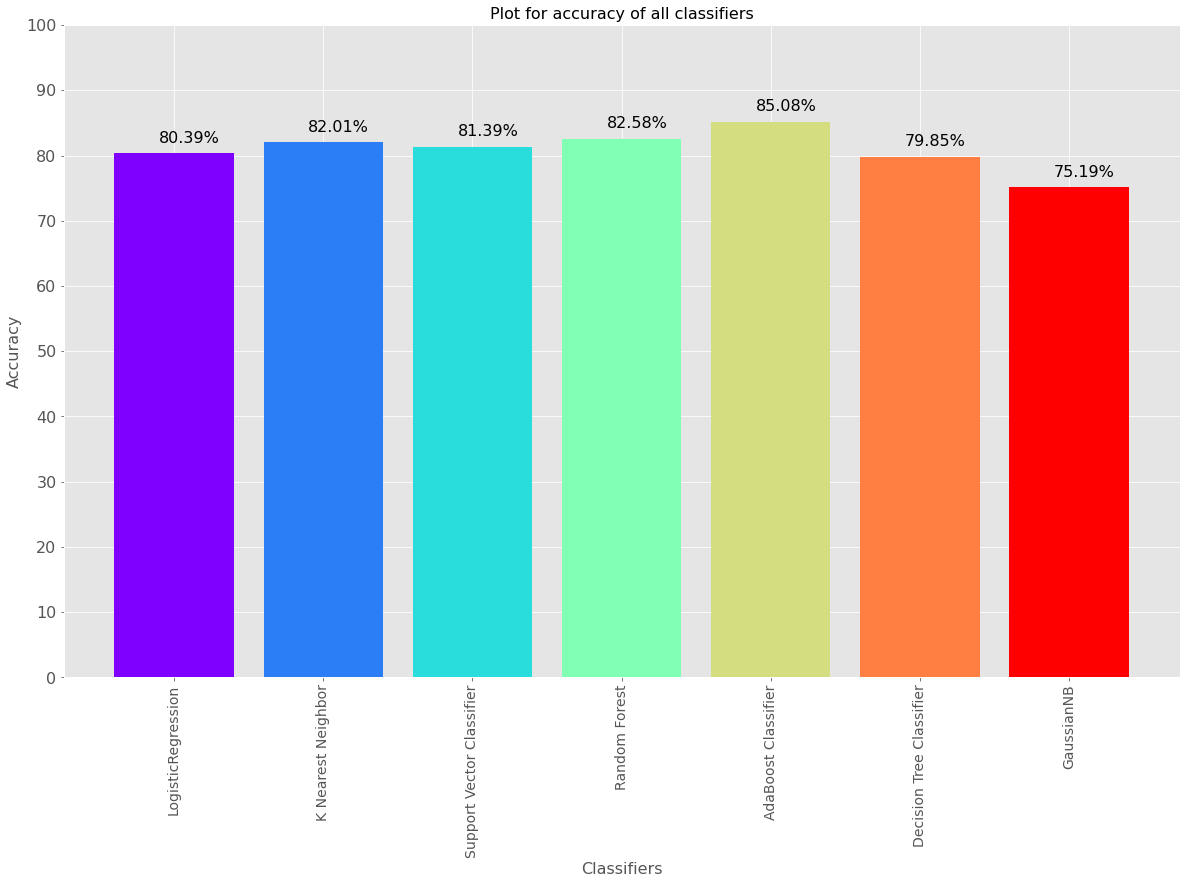

In [260]:

accuracies  = [80.39 , 82.01 , 81.39 , 82.58 , 85.08 , 79.85 , 75.19]

plt.figure(figsize = (20,12))
colors = rainbow(np.linspace(0, 1, len(models)))
barplot = plt.bar(x = names , height = accuracies , color = colors ,tick_label = names)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks( rotation = 90 , fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

After carefully observing the plot above we can conclude that AdaBoostClassifier has the best accuracy and confusion_matrix scores.<br>
So we'll use **AdaBoost Classifier** for our future predictions. 

#### Training AdaBoostClassifier again

In [261]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=13)
# base_estimator
adaboost_classifier = AdaBoostClassifier( n_estimators= 1000 )
adaboost_classifier.fit(X_train , y_train)
y_prediction = adaboost_classifier.predict(X_test)
adaboost_classifier.score(X_train, y_train)
acc_adaboost_classifier = round(adaboost_classifier.score(X_train, y_train) * 100, 2)
print(round(acc_adaboost_classifier,2,), "%")

84.9 %


#### Hyperparameter tuning
of AdaBoost Classifier.

Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.
There are two types of hyperparameter tuning - Grid Search CV and Randomised Search , here we'll use grid search cv for our further tuning. Read more about [Hyperparameter Tuning](https://www.geeksforgeeks.org/hyperparameter-tuning/).

In [262]:
param_grid = {'learning_rate':[0.001, 0.10, 0.1, 1]  ,  'n_estimators':range(50, 200, 50)}


ab = AdaBoostClassifier( random_state = 19)


grid_ab = GridSearchCV(ab , param_grid, scoring = 'accuracy')
grid_ab.fit(X_train, y_train)

print("Best Hyper Parameters:\n",grid_ab.best_params_)
print("training accuracy:\n",grid_ab.best_score_)
ab_grid_pred = grid_ab.best_estimator_.predict(X_test)

print("Accuracy:",accuracy_score(ab_grid_pred , y_test))

print("Confusion Matrix:\n",confusion_matrix(ab_grid_pred , y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(ab_grid_pred , y_test))


Best Hyper Parameters:
 {'learning_rate': 1, 'n_estimators': 150}
training accuracy:
 0.8447082816047515
Accuracy: 0.8500851788756388
Confusion Matrix:
 [[6584  889]
 [ 431  901]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7473
           1       0.50      0.68      0.58      1332

    accuracy                           0.85      8805
   macro avg       0.72      0.78      0.74      8805
weighted avg       0.87      0.85      0.86      8805



**Confusion Matrix**<br>
This is used for binary classification as True Negative , False Negaitve , True Positive and False Positive . Read more about [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [263]:
predictions = cross_val_predict(grid_ab, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[15297,  1040],
       [ 2162,  2043]], dtype=int64)

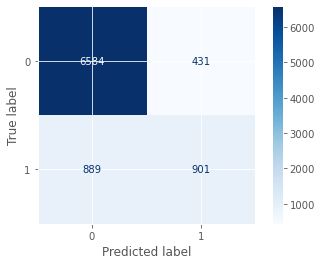

In [264]:
plot_confusion_matrix( grid_ab ,X_test , y_test , cmap = 'Blues' )

#### PLotting y_test and y_predicted for our datset . 

After successfully applying classifier algortihms on our datasets , Let's plot our actual y_test and predicted y, and have a look on the difference in values of both . 

>1, train: 0.795, test: 0.797
>2, train: 0.795, test: 0.797
>3, train: 0.795, test: 0.797
>4, train: 0.797, test: 0.802
>5, train: 0.813, test: 0.813
>6, train: 0.817, test: 0.821
>7, train: 0.812, test: 0.821
>8, train: 0.826, test: 0.831
>9, train: 0.822, test: 0.825
>10, train: 0.828, test: 0.834
>11, train: 0.823, test: 0.826
>12, train: 0.833, test: 0.840
>13, train: 0.836, test: 0.843
>14, train: 0.838, test: 0.846
>15, train: 0.838, test: 0.846
>16, train: 0.840, test: 0.846
>17, train: 0.835, test: 0.842
>18, train: 0.841, test: 0.848
>19, train: 0.842, test: 0.849
>20, train: 0.842, test: 0.847


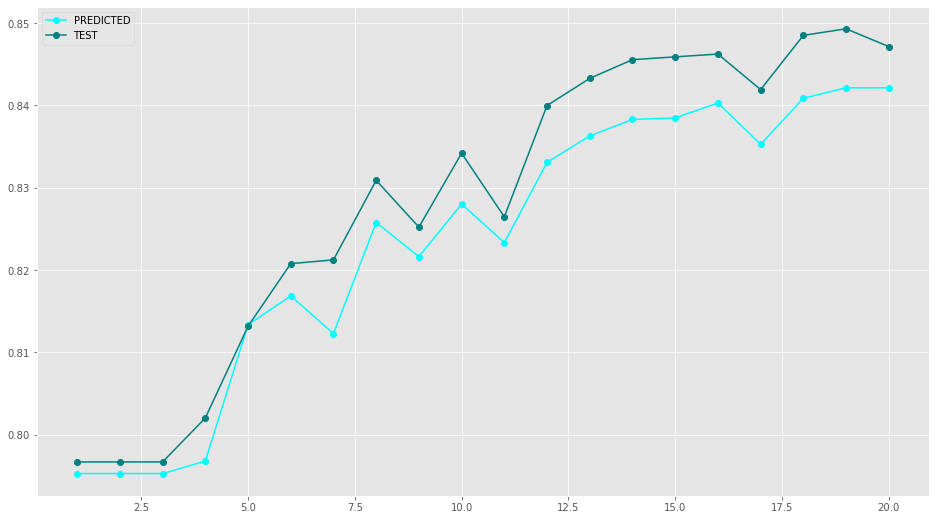

In [265]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:

    model = AdaBoostClassifier(n_estimators=i)
    
    model.fit(X_train, y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_accuracy)
    
    
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))

plt.figure(figsize=(16,9))
plt.plot(values, train_scores, '-o', label='PREDICTED' , color = 'aqua')
plt.plot(values, test_scores, '-o', label='TEST' , color = 'teal')
plt.legend()
plt.show()

#### Receiver Operator Characteristic_Area Under Curve (ROC_AUC) Curve
There is a lot more to learn about Roc_Auc curve , visit the link attached below to eplore about roc_auc curve . For now the ROC_AUC curve helps us visualize how well our machine learning classifier is performing.
Go through this article to have in depth knowledge of [Roc_Auc curve](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/).

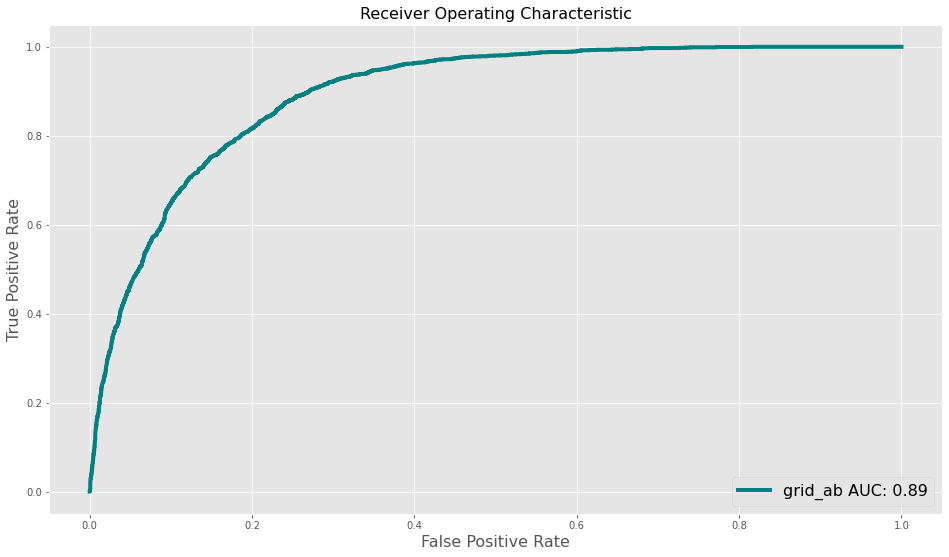

In [266]:
probs = grid_ab.predict_proba(X_test)

probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
label = 'grid_ab' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.figure(figsize=(16,9)) 
plt.plot(fpr, tpr,label = label , linewidth = 4 ,color = 'teal')
   
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

Saving the Machine Learning Model. There are various ways through which we can save a machine learning model , in here we are using joblib to save our best model .Read more about saving a machine learning model [here](https://www.geeksforgeeks.org/saving-a-machine-learning-model/)

In [267]:
import joblib
joblib.dump(grid_ab , 'AdaBoostClassifier.pkl')

['AdaBoostClassifier.pkl']